<h1> Importing libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

C:\Users\yuvas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1> Reading the dataset </h1>

In [2]:
data=pd.read_csv("car performance-dataset.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
data.shape

(398, 9)

In [6]:
# Satistical Analysis
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<h1> Handling Missing Values </h1>

In [8]:
# finding the missing values if any
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [9]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
data["horsepower"].replace('?', np.nan, inplace=True)

In [11]:
data["horsepower"] = pd.to_numeric(data["horsepower"])

In [12]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [13]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
mean_horsepower = data["horsepower"].mean()

In [15]:
data["horsepower"].fillna(mean_horsepower, inplace=True)

In [16]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

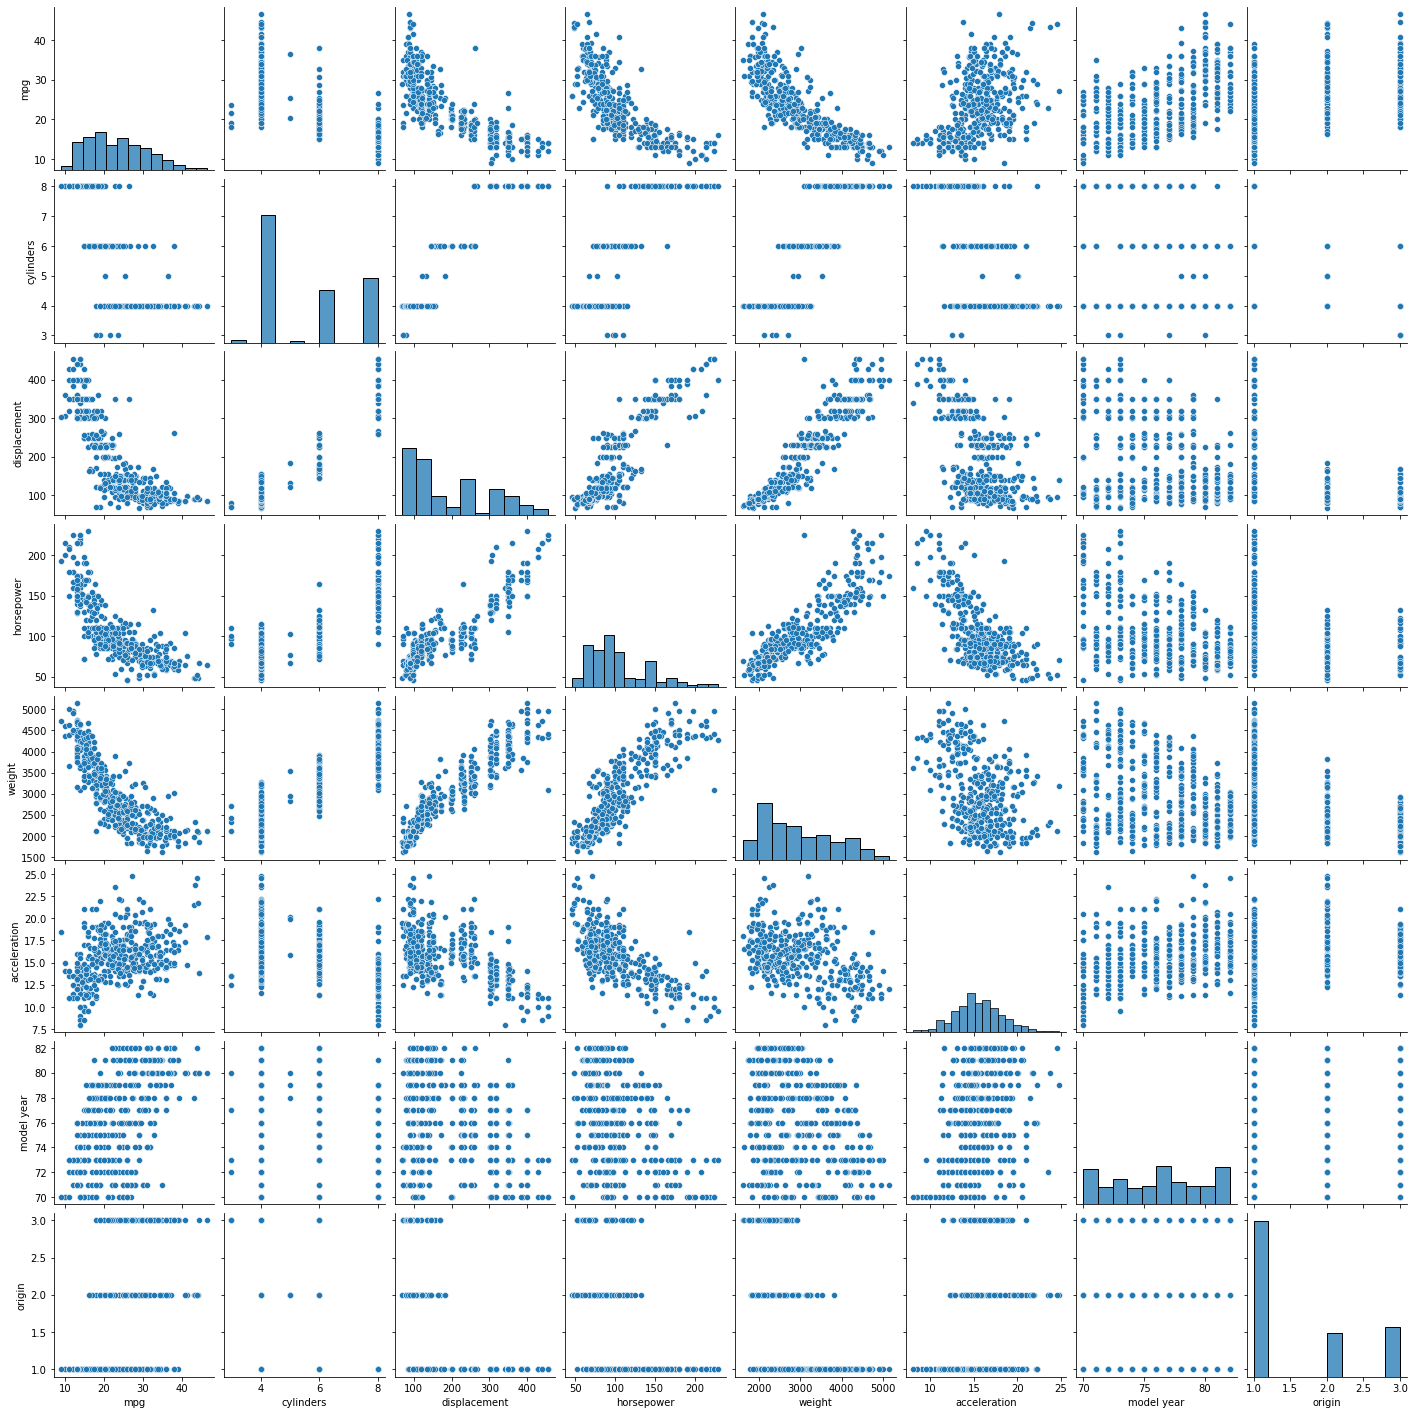

In [17]:
sns.pairplot(data)

<AxesSubplot:>

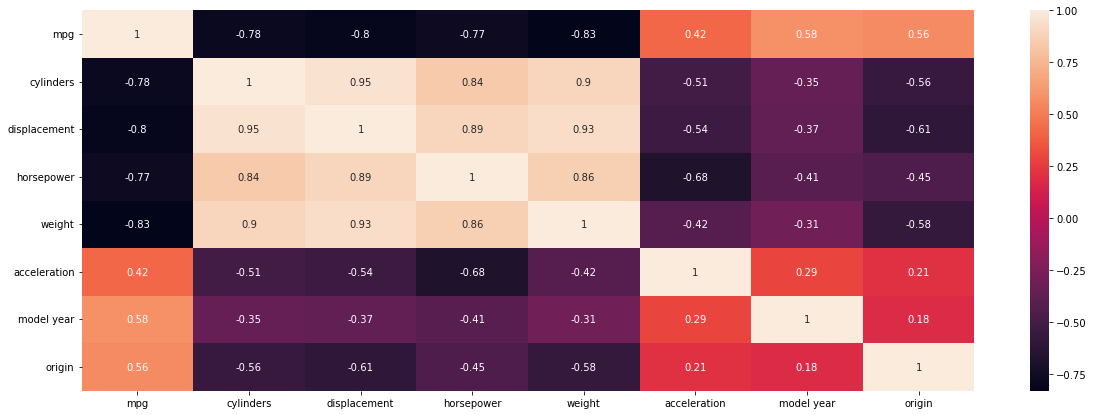

In [18]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True)

In [19]:
#Seperating the dependent and the independent variables
y=data.iloc[:,0:1]
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [20]:
x=data.iloc[:,1:-1]
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [21]:
names=x.columns
standardScale = StandardScaler()
x=standardScale.fit_transform(x)

In [22]:
x

array([[ 1.49819126,  1.0906037 ,  0.66919608, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.58659918, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.19342642, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66759129, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58895674, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [23]:
x=pd.DataFrame(x,columns=names)
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,-0.715145


In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def score(pred,test):
    print("Mean squared error: ",mean_squared_error(pred,test))
    print("Mean absolute error: ",mean_absolute_error(pred,test))
    print("R2 score: ",r2_score(pred,test))

<h1> MultiLinear Regression </h1>

<h3> Splitting the data set into train and test sets </h3>

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
#model building

In [27]:
model=LinearRegression()

<h3> Training the model using Train data set </h3>

In [28]:
#Fit the model with train data
model.fit(x_train,y_train)

LinearRegression()

<h3> Predicting Using Train Set </h3>

In [29]:
pred=model.predict(x_train)

In [30]:
score(pred,y_train)

Mean squared error:  10.914806924651483
Mean absolute error:  2.4862549017250433
R2 score:  0.7789135860533445


<h3> Predicting Using Test Set </h3>

In [31]:
pred=model.predict(x_test)

In [32]:
score(pred,y_test)

Mean squared error:  11.49595782738201
Mean absolute error:  2.711643065576289
R2 score:  0.7719081286269427


<h1> Polynomial Regression </h1>

In [33]:
#convert the normal values to polynomial features
pr=PolynomialFeatures(degree=2,interaction_only=True)

In [34]:
x_poly=x
x_poly=pr.fit_transform(x_poly)
x_poly

array([[ 1.        ,  1.49819126,  1.0906037 , ...,  2.10832807,
         0.92646888,  1.16384542],
       [ 1.        ,  1.49819126,  1.5035143 , ...,  2.40377014,
         1.05629587,  1.16384542],
       [ 1.        ,  1.49819126,  1.19623199, ...,  2.69921221,
         1.18612286,  1.16384542],
       ...,
       [ 1.        , -0.85632057, -0.56103873, ..., -2.33683998,
         1.03033047, -1.15995296],
       [ 1.        , -0.85632057, -0.70507731, ...,  1.78551561,
        -0.78724737, -1.15995296],
       [ 1.        , -0.85632057, -0.71467988, ...,  2.25664196,
        -0.99497056, -1.15995296]])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=0)

In [36]:
lr=LinearRegression()

<h3> Training the model using Train data set </h3>

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

<h3>Predicting using train set</h3>

In [38]:
pred=lr.predict(x_train)

In [39]:
score(pred,y_train)

Mean squared error:  6.588316764499289
Mean absolute error:  1.8761727113358235
R2 score:  0.8773021473330355


<h3>Predicting using test set</h3>

In [40]:
pred=lr.predict(x_test)

In [41]:
score(pred,y_test)

Mean squared error:  8.450483336328718
Mean absolute error:  2.1650027512463863
R2 score:  0.8300738345406496


<h1> Decision Tree Regressor </h1>

In [42]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,-0.715145


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
dtr=DecisionTreeRegressor()

<h3>Training Using Train set </h3>

In [45]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

<h3>Predicting using train set </h3>

In [46]:
preddt=dtr.predict(x_train)

In [47]:
score(preddt,y_train)

Mean squared error:  0.0
Mean absolute error:  0.0
R2 score:  1.0


<h3> Predicting using test set </h3>

In [48]:
preddt=dtr.predict(x_test)

In [49]:
score(preddt,y_test)

Mean squared error:  8.414750000000002
Mean absolute error:  2.085
R2 score:  0.8450372225572841


<h1>Random forest Regressor</h1>

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [51]:
rf=RandomForestRegressor(n_estimators=100,random_state=0)

In [52]:
y_train = y_train.values.ravel()

<h3> Training using Train dataset </h3>

In [53]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

<h3> Predicting Using Train set </h3>

In [54]:
predrf=rf.predict(x_train)

In [55]:
score(predrf,y_train)

Mean squared error:  1.1666756368715094
Mean absolute error:  0.7353407821229055
R2 score:  0.9785920610829811


<h3> Predicting using Test set </h3>

In [56]:
predrf=rf.predict(x_test)

In [57]:
score(predrf,y_test)

Mean squared error:  4.905744449999998
Mean absolute error:  1.5908499999999992
R2 score:  0.9080910266392863


<h1> Saving the model </h1>

In [58]:
pickle.dump(rf,open("regression.pkl","wb"))